# Team HexCode: Eagle🦅

In [2]:
import pandas as pd         
import numpy as np          

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Imputer
from sklearn.impute import KNNImputer
import random

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from keras.models import load_model
import numpy as np

In [3]:
# Load the .npz fil|e
realdata = np.load('real.npz')
fakedata = np.load('fake.npz')

In [4]:
x_real = realdata['x']
y_real = realdata['y']

x_fake = fakedata['x']
y_fake = fakedata['y']

In [5]:
knnimputer = KNNImputer(n_neighbors=20)

In [6]:
for i in range(len(x_real)):
    x_real[i][np.isinf(x_real[i])] = np.nan
    x_real[i] = knnimputer.fit_transform(x_real[i])
for i in range(len(x_fake)):
    x_fake[i][np.isinf(x_fake[i])] = np.nan
    x_fake[i] = knnimputer.fit_transform(x_fake[i])

In [7]:
# Reshape x to be a 2D array
x_reshaped_real = x_real.reshape(x_real.shape[0], -1)
x_reshaped_fake = x_fake.reshape(x_fake.shape[0], -1)

In [8]:
# Loading DataSet into a 2d DataFrame

# Real 
dfx_real = pd.DataFrame(x_reshaped_real)
dfy_real = pd.DataFrame(y_real)

# Samples from Real
dfx_sample_real = pd.DataFrame(x_real[700])
dfy_sample_real = pd.DataFrame(y_real[700])

# Fake
dfx_fake = pd.DataFrame(x_reshaped_fake)

# Samples from Fake
dfx_sample_fake = pd.DataFrame(x_fake[370])
dfy_sample_fake = pd.DataFrame(y_fake[370])

In [21]:
index_list = {}
y_real = pd.DataFrame(y_real)
# Find the indices where the value is 1
target_value =1
for index, row in y_real.iterrows():
    for column_name, value in row.items():
        if value == target_value:
            print(f"Value {target_value} found in row {index} in column {column_name}")

Value 1 found in row 0 in column 122
Value 1 found in row 0 in column 123
Value 1 found in row 0 in column 124
Value 1 found in row 0 in column 125
Value 1 found in row 0 in column 126
Value 1 found in row 0 in column 127
Value 1 found in row 0 in column 128
Value 1 found in row 0 in column 129
Value 1 found in row 0 in column 130
Value 1 found in row 0 in column 131
Value 1 found in row 0 in column 132
Value 1 found in row 0 in column 133
Value 1 found in row 0 in column 134
Value 1 found in row 0 in column 135
Value 1 found in row 0 in column 136
Value 1 found in row 0 in column 137
Value 1 found in row 0 in column 138
Value 1 found in row 0 in column 139
Value 1 found in row 0 in column 140
Value 1 found in row 0 in column 141
Value 1 found in row 0 in column 142
Value 1 found in row 0 in column 143
Value 1 found in row 0 in column 144
Value 1 found in row 0 in column 145
Value 1 found in row 0 in column 146
Value 1 found in row 0 in column 147
Value 1 found in row 0 in column 148
V

# Preparing Dataset fake/real

In [9]:
# Create a DataFrame with a column containing 750 1's
real_label = pd.DataFrame({'real_fake': [1] * 750})
train_Data1 = pd.concat([dfx_real, real_label], axis=1)
train_Data1

,0,1,2,3,4,5,6,7,8,9,...,201789,201790,201791,201792,201793,201794,201795,201796,201797,real_fake
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000040,2.998114e-05,0.000009,0.000025,0.000036,0.000009,0.000004,1.913309e-05,2.330542e-05,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000025,8.344650e-07,0.000009,0.000047,0.000051,0.000007,0.000023,2.205372e-06,2.539158e-05,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,1.251698e-05,0.000066,0.000028,0.000008,0.000012,0.000002,1.192093e-07,4.649162e-06,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000003,5.763769e-05,0.000103,0.000081,0.000008,0.000007,0.000010,4.470348e-06,5.960464e-08,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000081,2.744198e-04,0.000032,0.000081,0.000023,0.000003,0.000252,6.842613e-04,3.945827e-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,2.896786e-05,0.000046,0.000030,0.000038,0.000046,0.000016,2.080202e-05,2.855062e-05,1
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000003,4.351139e-06,0.000026,0.000019,0.000004,0.000006,0.000006,4.208088e-05,2.145767e-05,1
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000022,4.327297e-05,0.000022,0.000024,0.000003,0.000003,0.000007,1.013279e-05,1.913309e-05,1
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000039,1.919270e-05,0.000013,0.000005,0.000010,0.000006,0.000010,4.416704e-05,6.669760e-05,1


In [10]:
# Create a DataFrame with a column containing 750 0's
fake_label = pd.DataFrame({'real_fake': [0] * 750})
train_Data0 = pd.concat([dfx_fake, fake_label], axis=1)
train_Data0

,0,1,2,3,4,5,6,7,8,9,...,201789,201790,201791,201792,201793,201794,201795,201796,201797,real_fake
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000003,1.877546e-05,0.000019,9.536743e-07,0.000004,0.000004,0.000026,7.849932e-05,3.975630e-05,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000061,1.180172e-05,0.000006,8.344650e-06,0.000049,0.000120,0.000042,1.770258e-05,1.072884e-06,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,1.507998e-05,0.000015,1.114607e-05,0.000015,0.000007,0.000002,2.086163e-06,5.125999e-06,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000004,2.032518e-05,0.000110,7.283688e-05,0.000042,0.000021,0.000001,3.576279e-07,0.000000e+00,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000004,3.558397e-05,0.000034,1.126528e-05,0.000010,0.000071,0.000052,2.235174e-05,1.335144e-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000025,3.540516e-05,0.000060,2.586842e-05,0.000081,0.000024,0.000001,9.351969e-05,1.195669e-04,0
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000004,2.032518e-05,0.000110,7.283688e-05,0.000042,0.000021,0.000001,3.576279e-07,0.000000e+00,0
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000028,1.287460e-05,0.000007,2.622604e-06,0.000020,0.000048,0.000020,3.099442e-06,8.404255e-06,0
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000011,5.483627e-06,0.000008,2.807379e-05,0.000012,0.000020,0.000015,4.410744e-06,5.125999e-06,0


In [10]:
train_Data0.max(axis=1).sort_values(ascending=True)

182    22912.0
347    22960.0
430    22976.0
664    22992.0
662    23024.0
        ...   
166        inf
167        inf
415        inf
160        inf
0          inf
Length: 750, dtype: float64

In [11]:
Train_Data = pd.concat([train_Data1, train_Data0], axis=0)
Train_Data=Train_Data.reset_index()
Train_Data.drop(columns=['index'],axis=1,inplace=True)
Train_Data

,0,1,2,3,4,5,6,7,8,9,...,201789,201790,201791,201792,201793,201794,201795,201796,201797,real_fake
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000040,2.998114e-05,0.000009,0.000025,0.000036,0.000009,0.000004,1.913309e-05,2.330542e-05,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000025,8.344650e-07,0.000009,0.000047,0.000051,0.000007,0.000023,2.205372e-06,2.539158e-05,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,1.251698e-05,0.000066,0.000028,0.000008,0.000012,0.000002,1.192093e-07,4.649162e-06,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000003,5.763769e-05,0.000103,0.000081,0.000008,0.000007,0.000010,4.470348e-06,5.960464e-08,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000081,2.744198e-04,0.000032,0.000081,0.000023,0.000003,0.000252,6.842613e-04,3.945827e-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000025,3.540516e-05,0.000060,0.000026,0.000081,0.000024,0.000001,9.351969e-05,1.195669e-04,0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000004,2.032518e-05,0.000110,0.000073,0.000042,0.000021,0.000001,3.576279e-07,0.000000e+00,0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000028,1.287460e-05,0.000007,0.000003,0.000020,0.000048,0.000020,3.099442e-06,8.404255e-06,0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000011,5.483627e-06,0.000008,0.000028,0.000012,0.000020,0.000015,4.410744e-06,5.125999e-06,0


In [12]:
count = np.isinf(Train_Data).values.sum() 
print("It contains " + str(count) + " infinite values") 

It contains 6633 infinite values


# ML a5eeeeeern

In [13]:
X = Train_Data.drop('real_fake',axis=1)
y = Train_Data['real_fake']

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Assuming X_train is your DataFrame
nan_sum_greater_than_zero = X_train.isna().sum()[X_train.isna().sum() > 0]

print("Sum of NaN values greater than 0:")
print(nan_sum_greater_than_zero)

Sum of NaN values greater than 0:
Series([], dtype: int64)


In [11]:
model = load_model('model.h5')

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## RF Model 13%

In [15]:
# Build a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=37, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [17]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       154
           1       0.90      0.88      0.89       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



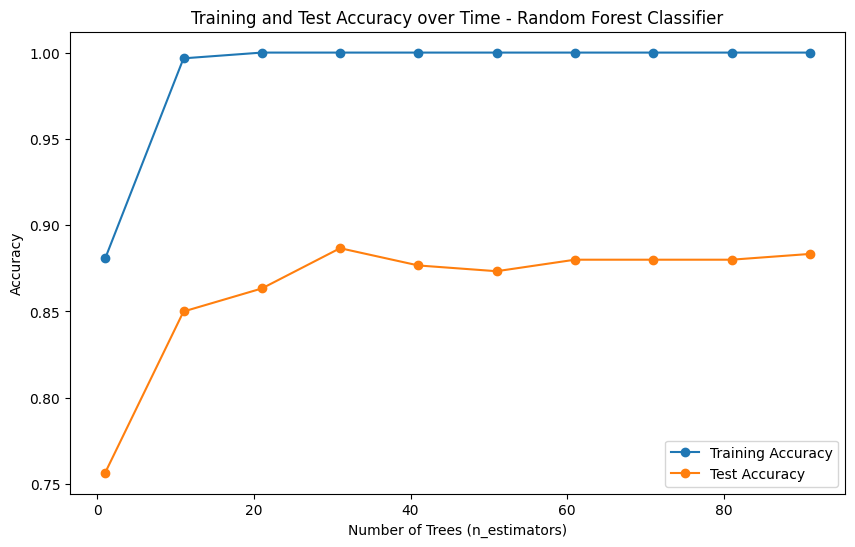

In [18]:
# Lists to store training and test accuracy
train_accuracy_list = []
test_accuracy_list = []

# Train the model incrementally and record accuracy
for i in range(1, 101, 10):  # Adjust as needed
    # Incremental training
    rf_classifier.set_params(n_estimators=i)
    rf_classifier.fit(X_train, y_train)

    # Training accuracy
    y_train_pred = rf_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_list.append(train_accuracy)

    # Test accuracy
    y_test_pred = rf_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_list.append(test_accuracy)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101, 10), train_accuracy_list, label='Training Accuracy', marker='o')
plt.plot(range(1, 101, 10), test_accuracy_list, label='Test Accuracy', marker='o')

plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy over Time - Random Forest Classifier')
plt.legend()
plt.show()

In [ ]:
joblib.dump(rf_classifier, 'rf_knn_v2.pkl')

In [13]:
sample1 = dfx_real.iloc[0:1][0:]
sample2 = dfx_fake.iloc[76:77][0:]
# Create a DataFrame with all zeros
#df_empty = pd.DataFrame(0, index=[0], columns=range(201798))
df_empty = pd.DataFrame(np.random.rand(1, 201798), index=[0], columns=range(201798))
df_empty

,0,1,2,3,4,5,6,7,8,9,...,201788,201789,201790,201791,201792,201793,201794,201795,201796,201797
0,0.684123,0.710127,0.635142,0.010839,0.580525,0.617206,0.268204,0.042009,0.265754,0.807368,...,0.745575,0.035169,0.540408,0.927228,0.902782,0.19993,0.553584,0.431464,0.29816,0.208279


In [16]:
model1 = joblib.load('rf_knn_v2.pkl') # loading Model

In [19]:
p1 =model1.predict_proba(df_empty)
p2 = model1.predict_proba(sample1)


array([0.07692308, 0.92307692])

In [38]:
reals=[]
reals.append(p1)
reals.append(p2)
reals

[array([0], dtype=int64), array([1], dtype=int64)]

In [36]:
# Convert the list to a NumPy array
reals = np.array(reals)
min_value = np.min(reals)
min_index = np.unravel_index(np.argmin(reals), reals.shape)
print(min_value,min_index[0])

0.07692307692307693 1


# Visualization

In [20]:
def visualize_spectrogram(spectrogram_array):
    plt.imshow(spectrogram_array.T, aspect='auto', origin='lower', cmap='plasma')
    plt.xlabel('Time (Tx)')
    plt.ylabel('Frequency Bin')
    plt.title('Spectrogram Visualization')
    plt.colorbar(label='Intensity')
    plt.show()


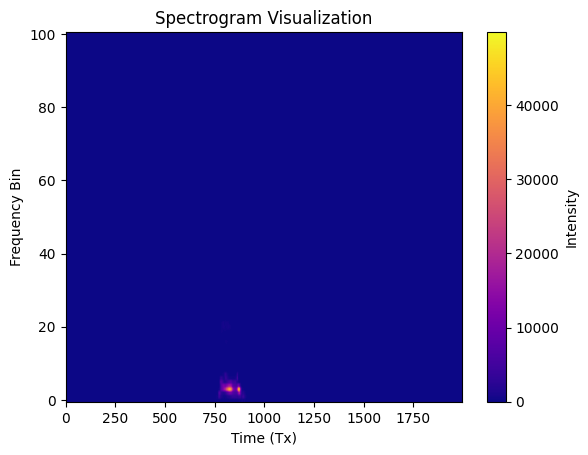

In [21]:
visualize_spectrogram(dfx_sample_fake)

In [22]:
dfx_sample_fake.iloc[:750,0:3]

,0,1,2
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
745,0.002234,2.076172,7.023438
746,17.796875,20.265625,3.464844
747,29.343750,22.265625,0.640137
748,0.076355,13.656250,10.468750


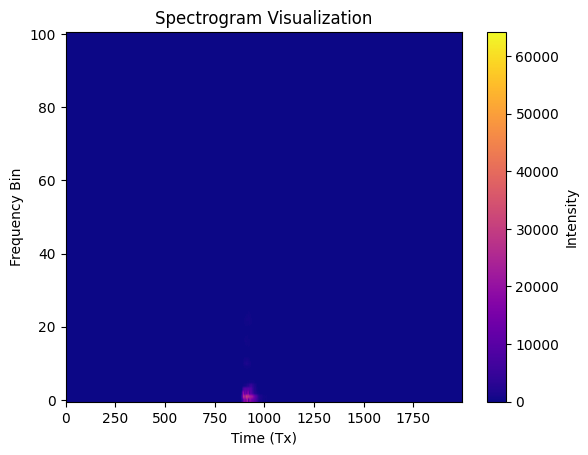

In [23]:
visualize_spectrogram(dfx_sample_real)

In [24]:
dfy_sample_real.T.iloc[:,240:300]

,240,241,242,243,244,245,246,247,248,249,...,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1


In [25]:
dfx_sample_real.iloc[400:500,0:17]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
400,0.000140,0.145874,0.263184,0.063232,0.345703,0.139526,0.043579,0.058838,0.001155,0.074158,0.061859,0.010788,0.001825,0.001251,0.001745,0.014633,0.013863
401,0.020264,0.376953,0.827148,1.717773,1.196289,0.097534,0.102234,0.011299,0.036438,0.000513,0.031235,0.010666,0.002218,0.005627,0.003103,0.009865,0.012375
402,0.001217,0.183838,0.386963,1.351562,0.562500,0.112000,0.022263,0.023575,0.021240,0.081970,0.079956,0.006405,0.000242,0.001455,0.006649,0.022446,0.012337
403,0.044281,0.232666,0.120789,0.040710,0.118530,0.053284,0.077087,0.034485,0.004375,0.021484,0.138672,0.072449,0.017426,0.002897,0.002298,0.007820,0.003551
404,0.000002,0.275146,0.205200,0.093811,0.034485,0.054382,0.189819,0.114563,0.001707,0.111511,0.224976,0.048065,0.001322,0.011200,0.018921,0.005547,0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.039307,0.360107,0.407227,0.516113,0.288086,0.011406,0.091675,0.019928,0.200439,0.423828,0.104187,0.009026,0.002954,0.000863,0.003643,0.023804,0.026627
496,0.422363,0.270264,0.116272,0.351562,0.709961,0.551758,0.074036,0.028290,0.117554,0.195312,0.063538,0.007053,0.001217,0.006287,0.026001,0.008018,0.003769
497,0.619629,0.083557,0.376221,0.593262,0.447021,0.350342,0.291260,0.024445,0.016495,0.115723,0.158813,0.040497,0.010765,0.000176,0.013649,0.016190,0.011566
498,0.045135,1.957031,4.011719,3.335938,0.727539,0.131592,0.160522,0.041138,0.161987,0.487549,0.244507,0.015656,0.004360,0.000216,0.005325,0.004944,0.001643


# Scaling

In [26]:
scaler = MinMaxScaler()

In [27]:
dfx_real_scaled = scaler.fit_transform(dfx_real)
dfx_real_scaled = pd.DataFrame(dfx_real_scaled)
dfx_real_scaled

,0,1,2,3,4,5,6,7,8,9,...,201788,201789,201790,201791,201792,201793,201794,201795,201796,201797
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.108646e-04,0.000040,2.992153e-05,0.000009,0.000025,0.000036,0.000009,0.000004,0.000019,2.330542e-05
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.470348e-05,0.000025,7.748604e-07,0.000009,0.000047,0.000051,0.000007,0.000023,0.000002,2.539158e-05
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.960464e-08,0.000001,1.245737e-05,0.000066,0.000028,0.000008,0.000012,0.000001,0.000000,4.649162e-06
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.247095e-05,0.000003,5.757809e-05,0.000103,0.000081,0.000008,0.000007,0.000010,0.000004,5.960464e-08
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.156662e-04,0.000081,2.744198e-04,0.000032,0.000081,0.000023,0.000003,0.000251,0.000684,3.945827e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.633167e-05,0.000006,2.890825e-05,0.000046,0.000030,0.000038,0.000046,0.000016,0.000021,2.855062e-05
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.748604e-06,0.000003,4.291534e-06,0.000026,0.000019,0.000004,0.000006,0.000005,0.000042,2.145767e-05
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.688999e-06,0.000022,4.321337e-05,0.000021,0.000024,0.000003,0.000002,0.000006,0.000010,1.913309e-05
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.175570e-05,0.000039,1.913309e-05,0.000013,0.000005,0.000010,0.000006,0.000010,0.000044,6.669760e-05


In [28]:
dfx_fake_scaled = scaler.fit_transform(dfx_fake)
dfx_fake_scaled = pd.DataFrame(dfx_fake_scaled)
dfx_fake_scaled

,0,1,2,3,4,5,6,7,8,9,...,201788,201789,201790,201791,201792,201793,201794,201795,201796,201797
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000038,0.000003,1.841784e-05,0.000018,9.536743e-07,0.000004,0.000004,0.000026,7.838011e-05,3.975630e-05
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000019,0.000061,1.144409e-05,0.000006,8.344650e-06,0.000048,0.000120,0.000042,1.758337e-05,1.072884e-06
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000012,0.000002,1.472235e-05,0.000015,1.114607e-05,0.000015,0.000007,0.000002,1.966953e-06,5.125999e-06
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000015,0.000004,1.996756e-05,0.000110,7.283688e-05,0.000042,0.000021,0.000001,2.384186e-07,0.000000e+00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000012,0.000004,3.522635e-05,0.000034,1.126528e-05,0.000010,0.000071,0.000052,2.223253e-05,1.335144e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000031,0.000025,3.504753e-05,0.000060,2.586842e-05,0.000080,0.000024,0.000001,9.340048e-05,1.195669e-04
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000015,0.000004,1.996756e-05,0.000110,7.283688e-05,0.000042,0.000021,0.000001,2.384186e-07,0.000000e+00
747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000012,0.000028,1.251698e-05,0.000006,2.622604e-06,0.000019,0.000048,0.000020,2.980232e-06,8.404255e-06
748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000019,0.000011,5.125999e-06,0.000007,2.807379e-05,0.000012,0.000020,0.000015,4.291534e-06,5.125999e-06
